In [1]:
pip install pandas matplotlib seaborn

In [1]:
!wget https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv -O global_temp.csv

--2026-02-03 05:26:11--  https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.141.233, 2001:4d0:2310:151::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.141.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12798 (12K) [text/csv]
Saving to: ‘global_temp.csv’

global_temp.csv     100%[===================>]  12.50K  --.-KB/s    in 0.04s   

2026-02-03 05:26:11 (319 KB/s) - ‘global_temp.csv’ saved [12798/12798]



In [2]:
import pandas as pd

df = pd.read_csv("global_temp.csv", skiprows=1)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.10,-0.17,-0.11,-0.22,-0.19,-0.11,-0.15,-0.24,-0.23,-0.18,-0.18,***,***,-0.13,-0.17,-0.21
1,1881,-0.20,-0.15,0.03,0.04,0.05,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-.10,-.18,0.04,-0.08,-0.19
2,1882,0.15,0.13,0.04,-0.17,-0.15,-0.23,-0.17,-0.08,-0.15,-0.24,-0.17,-0.36,-0.12,-.09,.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.18,-0.17,-0.08,-0.07,-0.14,-0.21,-0.11,-0.23,-0.11,-0.18,-.20,-.34,-0.16,-0.10,-0.19
4,1884,-0.13,-0.08,-0.36,-0.41,-0.34,-0.36,-0.30,-0.27,-0.27,-0.25,-0.34,-0.31,-0.29,-.27,-.11,-0.37,-0.31,-0.29


In [3]:
df = df[['Year', 'J-D']]
df.columns = ['Year', 'Annual_Mean_Temp']

df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]
df['Year'] = df['Year'].astype(int)

df.head()

,Year,Annual_Mean_Temp
0,1880,-0.18
1,1881,-0.09
2,1882,-0.12
3,1883,-0.18
4,1884,-0.29


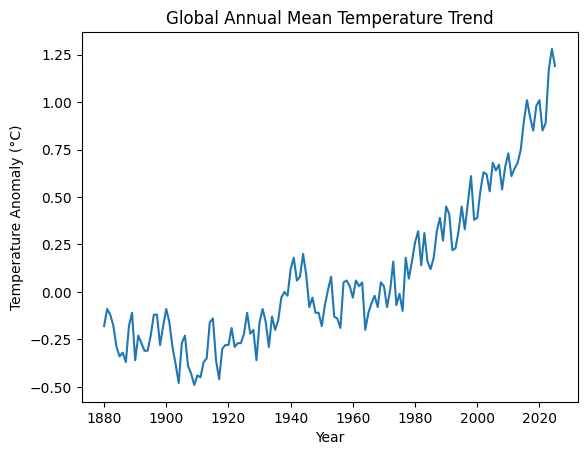

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Year'], df['Annual_Mean_Temp'])
plt.title("Global Annual Mean Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

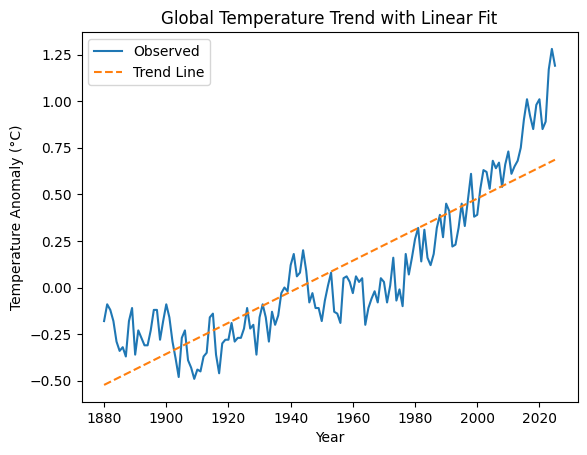

Estimated rate of warming: 0.0083 °C per year


In [5]:
import numpy as np

# Fit a linear trend line
z = np.polyfit(df['Year'], df['Annual_Mean_Temp'], 1)
trend = np.poly1d(z)

plt.figure()
plt.plot(df['Year'], df['Annual_Mean_Temp'], label='Observed')
plt.plot(df['Year'], trend(df['Year']), linestyle='--', label='Trend Line')
plt.title("Global Temperature Trend with Linear Fit")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.show()

print(f"Estimated rate of warming: {z[0]:.4f} °C per year")

In [6]:
before_1980 = df[df['Year'] < 1980]['Annual_Mean_Temp'].mean()
after_1980 = df[df['Year'] >= 1980]['Annual_Mean_Temp'].mean()

print("Average Temp Anomaly Before 1980:", round(before_1980, 3))
print("Average Temp Anomaly After 1980:", round(after_1980, 3))

Average Temp Anomaly Before 1980: -0.148
Average Temp Anomaly After 1980: 0.58


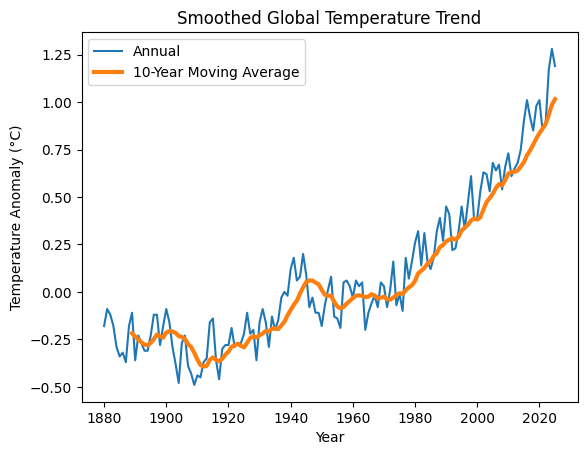

In [7]:
df['Moving_Avg'] = df['Annual_Mean_Temp'].rolling(window=10).mean()

plt.figure()
plt.plot(df['Year'], df['Annual_Mean_Temp'], label='Annual')
plt.plot(df['Year'], df['Moving_Avg'], linewidth=3, label='10-Year Moving Average')
plt.title("Smoothed Global Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.show()